# Nearest Neighbors Regressor

In [1]:
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import matplotlib as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("../X-Y data.csv")
df = df.fillna(0)
df.index=df.minute

In [3]:
MLDF_train = df[:10000][[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc','close-aapl']]

In [4]:
MLDF_test = df[10001:][[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc','close-aapl']]

Splitting X and Y

In [5]:
X = MLDF_train[[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc']]

In [6]:
Y = MLDF_train[['close-aapl']]

In [7]:
regr = KNeighborsRegressor(n_neighbors=2)
regr.fit(X, Y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

Testing

In [8]:
X_test=MLDF_test[[ 'reach_sum', 'virality_mean', 'influence_score_sum',
       'followers_mean', 'like_count', 'comment_count', 'share_count',
       'tweet_count', 'love_count', 'retweet_count', 'positive_sentiment',
       'negative_sentiment', 'score', 'open-apc', 'high-apc', 'low-apc',
       'close-apc', 'volume-apc']]

In [9]:
Y_test = MLDF_test['close-aapl']

In [10]:
Y_predicted = regr.predict(X_test)

In [11]:
prediction = pd.DataFrame()
prediction['Cours AAPL'] = MLDF_test['close-aapl']
prediction["pred_NN"] = Y_predicted

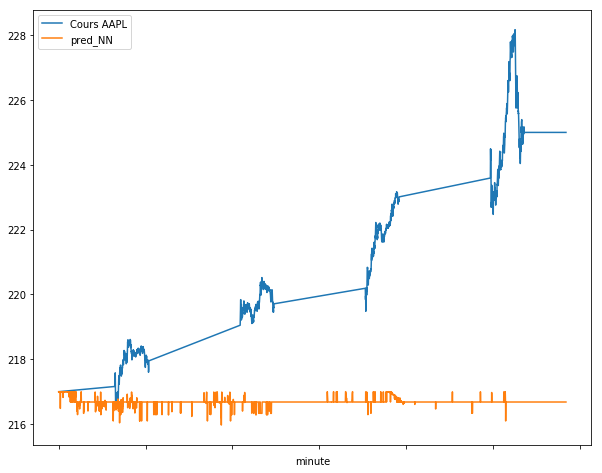

In [13]:
prediction.plot(figsize=(10,8))

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
error_value = mean_absolute_error(Y_test, Y_predicted)
error_value

4.024887126450094